## This notebook can help to analyse data of cases or deaths caused by COVID19 against vaccination percentage (either fully vaccinated or vaccinated with booster shot) across counties in US

### Choosen time period in format "mm/dd/yyyy" [with current data possible between 12/13/2020 -  02/01/2022]
The beginning of administration of booster shot is 12/15/2021. Keep this in mind depending of what data is to be analysed.
Look below at the graphs to see picks in cases and deaths accross US

In [1]:
period_start = '09/01/2021'
period_end = '11/30/2021'

### Choose the maximum and minimum population size of counties taken into consideration
The cases and deaths will be shown per 10000 inhabitants

In [42]:
pop_min = 10000
pop_max = 1000000

In [3]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [4]:
#Path to save figures
path = "figures/"

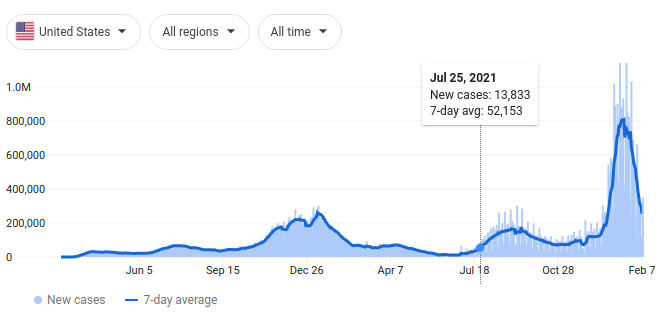

In [5]:
#Show cases plot from GOOGLE
Image(filename='cases.png') 

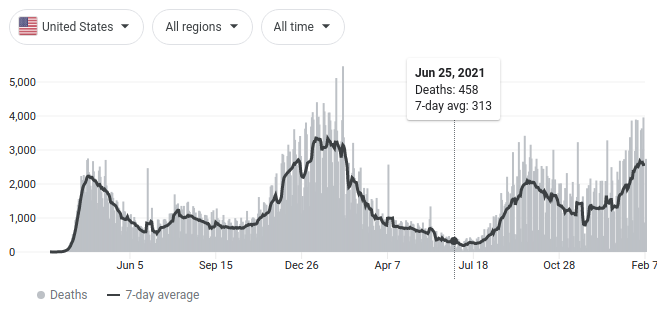

In [6]:
#Show deaths plot from GOOGLE
Image(filename='deaths.png') 

In [7]:
#Read population data [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df_pop = pd.read_csv('covid_county_population_usafacts.csv')

In [8]:
#Used functions and shared variables [Cases/Deaths processing]
def reformat_date(date):
    month, day, year = date.split("/")
    return year + "-" + month + "-" + day

def get_population(fips_list):
    temp_pop = list()
    for fips in fips_list:
        temp = df_pop.loc[(df_pop['countyFIPS'] == fips)]['population']
        temp_pop.append(temp.item())
    return temp_pop

columns = ['countyFIPS', reformat_date(period_start), reformat_date(period_end)]

In [9]:
#Proccess data related to deaths due to COVID-19 [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df = pd.read_csv('covid_deaths_usafacts.csv')

df_new = df.loc[:, columns]
filtered = df_new[ df_new['countyFIPS'] != 0 ]
filtered.to_csv("deaths.csv", index = False)

df_deaths = pd.read_csv('deaths.csv')
temp_pop = get_population(list(df_deaths['countyFIPS']))
df_deaths.insert(1, 'Population', temp_pop)
df_deaths.columns = ['countyFIPS', 'Population', 'Deaths_begin', 'Deaths_end']
df_deaths.to_csv("deaths_pop.csv", index = False)

In [10]:
#Proccess data related to number of infections (cases) of COVID-19 [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df = pd.read_csv('covid_confirmed_usafacts.csv')

df_new = df.loc[:, columns]
filtered = df_new[ df_new['countyFIPS'] != 0 ]
filtered.to_csv("cases.csv", index = False)

df_cases = pd.read_csv('cases.csv')
temp_pop = get_population(list(df_cases['countyFIPS']))
df_cases.insert(1, 'Population', temp_pop)
df_cases.columns = ['countyFIPS', 'Population', 'Cases_begin', 'Cases_end']
df_cases.to_csv("cases_pop.csv", index = False)

In [11]:
#Process data related to COVID-19 vaccination rates [aquired from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh]
df2 = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')

to_idx = max(df2.index[df2['Date'] == period_start].tolist())+1
from_idx = min(df2.index[df2['Date'] == period_end].tolist())
df_vax = df2[from_idx:to_idx]

df_vax.to_csv("vax.csv", index = False)
df_notnull = df_vax[df_vax['Series_Complete_Yes'].notnull()] #or Booster_Doses
df_notnull.to_csv("vax_no_missing_data.csv", index = False)

fips_counties = list(df_cases['countyFIPS'])
fips_to_delete = list()
vax_data = list()
for fips in fips_counties:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    temp = df_notnull.loc[(df_notnull['FIPS'] == fips_f) & (df_notnull['Date'] == period_start)]
    temp2 = df_notnull.loc[(df_notnull['FIPS'] == fips_f) & (df_notnull['Date'] == period_end)]
    if len(temp) == 1 and len(temp2) == 1:
        vax_data.append([fips, temp['Booster_Doses'].item(), temp2['Booster_Doses'].item(),
                         temp['Booster_Doses_Vax_Pct'].item(), temp2['Booster_Doses_Vax_Pct'].item(),
                         temp['Booster_Doses_18Plus'].item(), temp2['Booster_Doses_18Plus'].item(),
                         temp['Booster_Doses_18Plus_Vax_Pct'].item(), temp2['Booster_Doses_18Plus_Vax_Pct'].item(),
                         temp['Booster_Doses_65Plus'].item(), temp2['Booster_Doses_65Plus'].item(),
                         temp['Booster_Doses_65Plus_Vax_Pct'].item(), temp2['Booster_Doses_65Plus_Vax_Pct'].item(),
                         temp['Series_Complete_Yes'].item(), temp2['Series_Complete_Yes'].item(),
                         temp['Series_Complete_Pop_Pct'].item(), temp2['Series_Complete_Pop_Pct'].item(),
                         temp['Series_Complete_18Plus'].item(), temp2['Series_Complete_18Plus'].item(),
                         temp['Series_Complete_18PlusPop_Pct'].item(), temp2['Series_Complete_18PlusPop_Pct'].item(),
                         temp['Series_Complete_65Plus'].item(), temp2['Series_Complete_65Plus'].item(),
                         temp['Series_Complete_65PlusPop_Pct'].item(), temp2['Series_Complete_65PlusPop_Pct'].item()])
col = ['countyFIPS',
       'Booster_begin', 'Booster_end',
       'Booster_pct_begin', 'Booster_pct_end',
       'Booster18_begin', 'Booster18_end',
       'Booster18_pct_begin', 'Booster18_pct_end',
       'Booster65_begin', 'Booster65_end',
       'Booster65_pct_begin', 'Booster65_pct_end',
       'Complete_begin', 'Complete_end',
       'Complete_pct_begin', 'Complete_pct_end',
       'Complete18_begin', 'Complete18_end',
       'Complete18_pct_begin', 'Complete18_pct_end',
       'Complete65_begin', 'Complete65_end',
       'Complete65_pct_begin','Complete65_pct_end']

df_data = pd.DataFrame(vax_data, columns = col)  
df_data.to_csv("vax_processed.csv", index=False)

In [12]:
#Combine cases/deaths and vaccination data
df_deaths = pd.read_csv('deaths_pop.csv')
df_cases = pd.read_csv('cases_pop.csv')
df_vax = pd.read_csv('vax_processed.csv')

df_all = pd.concat([df_cases, df_deaths, df_vax], axis=1, join="inner")
df_all = df_all.loc[:,~df_all.columns.duplicated()]

df_all['Cases_diff'] = df_all['Cases_end'] - df_all['Cases_begin']
df_all['Cases_diff_pct'] = (df_all['Cases_end'] - df_all['Cases_begin'])*100/ df_all['Population']
df_all['Deaths_diff'] = df_all['Deaths_end'] - df_all['Deaths_begin']
df_all['Deaths_diff_pct'] = (df_all['Deaths_end'] - df_all['Deaths_begin'])*100/ df_all['Population']

df_all.to_csv("vax_cases_deaths.csv", index = False)

In [48]:
#Clean and filter the data
filter_pop = df_all[ (df_all['Population'] > pop_min) & (df_all['Population'] < pop_max) ]
filter_pop = filter_pop[ filter_pop['Complete_pct_end'] != 0 ]
filter_pop = filter_pop[ filter_pop['Deaths_begin'] < filter_pop['Deaths_end'] ]
filter_pop = filter_pop[ filter_pop['Cases_begin'] < filter_pop['Cases_end'] ]
#filter_cases = filter_cases[ filter_cases['Cases_diff'] > 10 ]

new_deaths_per_10k = list()
new_cases_per_10k = list()
avg_completed = list()
avg_boosted = list()
for index, row in filter_pop.iterrows():
    increase = (row['Deaths_diff'])*10000/row['Population']
    new_deaths_per_10k.append(increase)
    increase = (row['Cases_diff'])*10000/row['Population']
    new_cases_per_10k.append(increase)    
    avg = (row['Complete_pct_begin'] + row['Complete_pct_end'])/2
    avg_completed.append(avg)
    avg = (row['Booster_pct_begin'] + row['Booster_pct_end'])/2
    avg_boosted.append(avg)

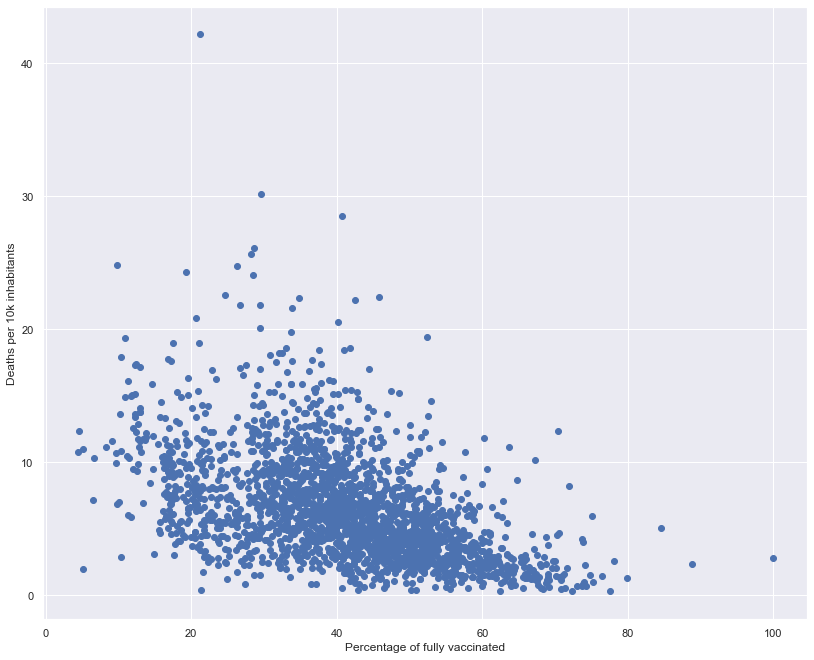

In [49]:
#Present the data of number of deaths caused by COVID19 against percentage of fully vaccinated
plt.scatter(avg_completed, new_deaths_per_10k)
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'fulvax_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

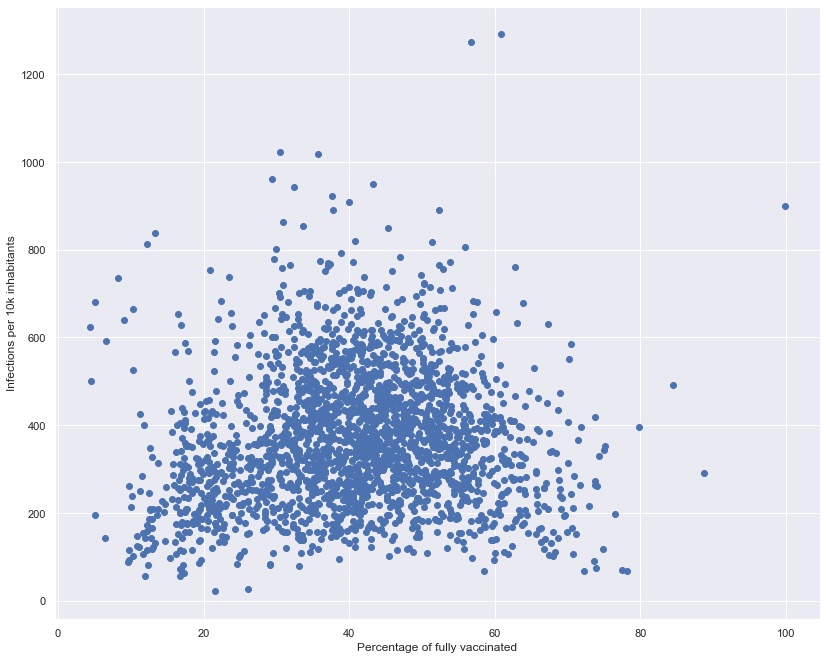

In [50]:
#Present the data of number of cases of infections with COVID19 against percentage of fully vaccinated
plt.scatter(avg_completed, new_cases_per_10k)
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'fulvax_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

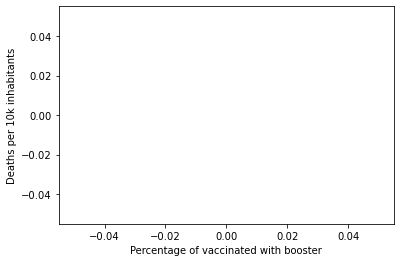

In [16]:
#Present the data of number of deaths caused by COVID19 against percentage of boosted
plt.scatter(avg_boosted, new_deaths_per_10k)
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'booster_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

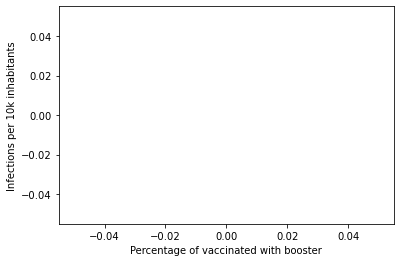

In [17]:
#Present the data of number of cases of infections with COVID19 against percentage of boosted
plt.scatter(avg_boosted, new_cases_per_10k)
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'booster_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

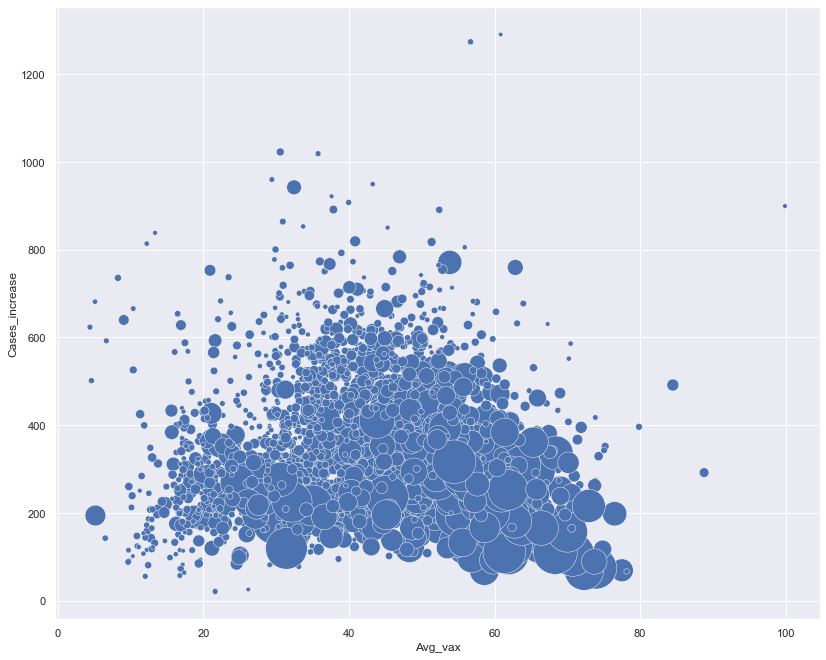

In [51]:
import seaborn as sns

filter_pop['Cases_increase'] = (filter_pop['Cases_diff'])*10000/filter_pop['Population']
filter_pop['Avg_vax'] = (filter_pop['Complete_pct_begin'] + filter_pop['Complete_pct_end'])/2
filter_pop['Deaths_increase'] = (filter_pop['Deaths_diff'])*10000/filter_pop['Population']

sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Avg_vax", y="Cases_increase", size="Population", legend=False, sizes=(20, 2000))
# show the graph
plt.show()

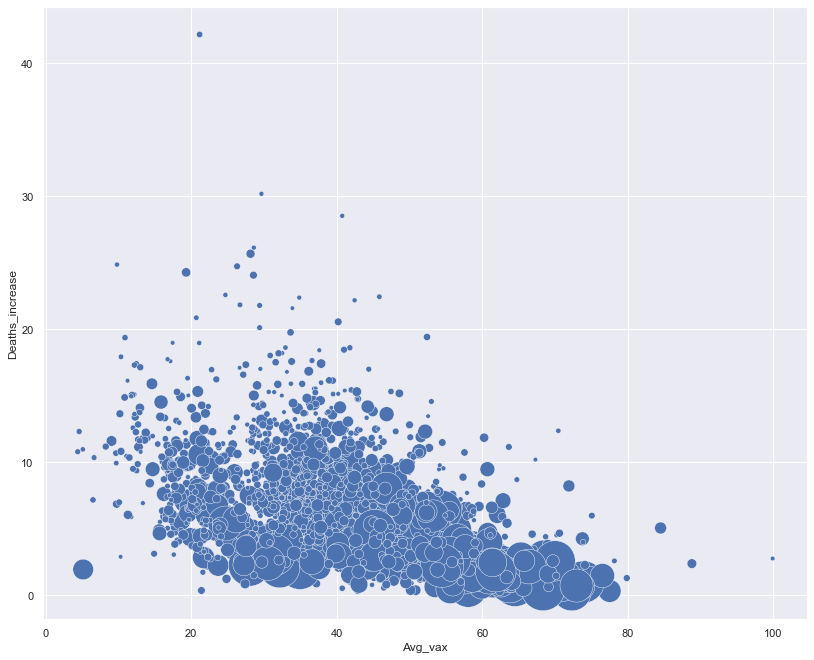

In [52]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Avg_vax", y="Deaths_increase", size="Population", legend=False, sizes=(20, 2000))
# show the graph
plt.show()